## Importing modules

In [1]:
!pip install surprise
import pandas as pd
import numpy as np
import random
from surprise import accuracy
from surprise import Dataset
from surprise import Reader
from surprise import SVD,SVDpp, SlopeOne, NMF, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering

from surprise.model_selection import GridSearchCV
from tqdm import tqdm
import matplotlib.pyplot as plt
from surprise.model_selection.validation import cross_validate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162995 sha256=f3efad7a1b25f88b24cc623b69b9fce381598a7057ab4dce3a7e0da90e46e9ca
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


## loading datasets

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import json
data_list = []

with open('/content/drive/MyDrive/295A project/Data/Clothes/Data/modcloth_final_data.json', 'r') as file:
    for line in file:
        data = json.loads(line)
        data_list.append(data)

In [4]:
df = pd.DataFrame(data_list)
df

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29,7,5.0,d,38,34,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31,13,3.0,b,30,36,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30,7,2.0,b,NaN,32,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.00,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,NaN,8,4.0,b,NaN,36,outerwear,NaN,5ft 8in,Jennifer,just right,fit,727820,8.50,average,Cute jacket!,Cute jacket!
82786,807722,NaN,12,5.0,ddd/f,NaN,34,outerwear,NaN,5ft 5in,Kelli,slightly long,small,197040,NaN,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,NaN,12,5.0,dddd/g,36.0,32,outerwear,NaN,5ft 4in,elacount,just right,fit,102493,NaN,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,NaN,12,4.0,NaN,NaN,NaN,outerwear,NaN,5ft 3in,jennaklinner,just right,fit,756491,NaN,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


In [5]:
df.isna().sum()

item_id               0
waist             79908
size                  0
quality              68
cup size           6255
hips              26726
bra size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe size         54875
shoe width        64183
review_summary     6725
review_text        6725
dtype: int64

In [6]:
df=df.drop(['waist','hips','bust','shoe size','shoe width'],axis=1)

In [7]:
df.isna().sum()

item_id              0
size                 0
quality             68
cup size          6255
bra size          6018
category             0
height            1107
user_name            0
length              35
fit                  0
user_id              0
review_summary    6725
review_text       6725
dtype: int64

In [8]:
df.dropna(inplace=True)


In [9]:
df.isna().sum()

item_id           0
size              0
quality           0
cup size          0
bra size          0
category          0
height            0
user_name         0
length            0
fit               0
user_id           0
review_summary    0
review_text       0
dtype: int64

<Axes: title={'center': 'quality'}, ylabel='Frequency'>

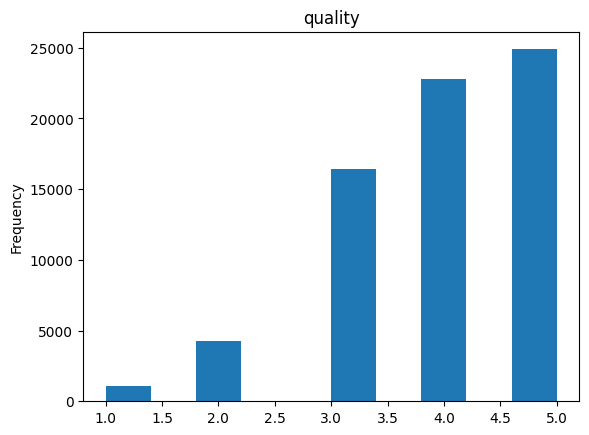

In [10]:
from matplotlib import pyplot as plt
df['quality'].plot(kind='hist', title='quality')
plt.gca()

## Building train and test sets

## Reading the data and creating train test splits

In [11]:
df

,item_id,size,quality,cup size,bra size,category,height,user_name,length,fit,user_id,review_summary,review_text
6725,152702,4,4.0,b,32,new,5ft 6in,avNYC,just right,small,668176,Too much ruching,"I liked the color, the silhouette, and the fab..."
6726,152702,4,5.0,c,34,new,5ft 6in,lanwei91,slightly short,fit,320759,Suits my body type!,From the other reviews it seems like this dres...
6727,152702,4,3.0,a,34,new,5ft 3in,angeladevoe5678,just right,fit,144785,I love the design and fit,I love the design and fit of this dress! I wo...
6728,152702,4,3.0,c,32,new,5ft 1in,Juli,slightly long,fit,52664,Beautiful Dress!,I bought this dress for work it is flattering...
6729,152702,4,5.0,c,32,new,5ft 6in,lhalton,just right,fit,155439,This is a very profession,This is a very professional look. It is Great ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82784,807722,4,3.0,a,32,outerwear,5ft 1in,ciwheeles,just right,large,317420,"It ran a little big, and","It ran a little big, and I'm not crazy about t..."
82785,807722,8,4.0,b,36,outerwear,5ft 8in,Jennifer,just right,fit,727820,Cute jacket!,Cute jacket!
82786,807722,12,5.0,ddd/f,34,outerwear,5ft 5in,Kelli,slightly long,small,197040,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,12,5.0,dddd/g,32,outerwear,5ft 4in,elacount,just right,fit,102493,I love this blazer. It is,I love this blazer. It is a great office piece...


In [12]:
# adding the rating scale of 1 to 10
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[["user_id","item_id","quality"]], reader)
raw_ratings = data.raw_ratings

# re arranging the dataset
random.shuffle(raw_ratings)

# splitting the data set into 80:20 training and testing data set
train_test_split_index = int(0.8 * len(raw_ratings))
raw_ratings_train = raw_ratings[:]
raw_ratings_test = raw_ratings[train_test_split_index:]

# constructing the train set
data.raw_ratings = raw_ratings_train  # assign the raw data back

# constructing the test set
testset = data.construct_testset(raw_ratings_test)

## SVD model training and Evaluation

In [13]:
"""
SVD parameters
N_factors: The number of factors.
N_epochs: The number of iterations of the SGD procedure.
lr_all – The learning rate for all parameters.
reg_all – The regularization term for all parameters.
"""

# constructing different parameter with different range of values
### note: these values are changed in the whole process of training to arrive at this specific values based on rmse scores.
svd_params = {
    "n_factors": [10, 20, 50],
    "n_epochs": [10, 20, 50],
    "lr_all": [0.002, 0.005, 0.01],
    "reg_all": [0.02, 0.1, 0.2]
    }

# using grid search cv with above parameters with cross validation of 3 and refit = True
grid_search = GridSearchCV(
    SVD,
    param_grid = svd_params,
    measures=["rmse"],
    cv=3,
    refit=True,
    n_jobs=-1,
    joblib_verbose=1
)

# fitting the data
grid_search.fit(data)

# getting best model out of the grid search and best parameters
best_model = grid_search.best_estimator["rmse"]
print(grid_search.best_params)


# pickle the model in case the run time stop in between
import pickle
with open(r"/content/drive/MyDrive/295A project/Data/Clothes/Models/svd_best_1.pickle", 'wb') as f:
    pickle.dump(best_model, f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  3.2min finished


{'rmse': {'n_factors': 10, 'n_epochs': 50, 'lr_all': 0.005, 'reg_all': 0.1}}


In [14]:
# a sample prediction to check the model prediction of a user and book
best_model.predict(uid=479149, iid=991397)

# calculating rmse on test set
testset_predictions = best_model.test(testset)
print(accuracy.rmse(testset_predictions))
print(accuracy.mae(testset_predictions))


RMSE: 0.7214
0.7213866095354059
MAE:  0.5830
0.5829737404419354


In [20]:
from collections import defaultdict

def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold)) for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls
def f1_score(precision, recall):
    if precision == 0 and recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from collections import defaultdict



# Compute Precision and Recall at k=10
precisions, recalls = precision_recall_at_k(testset_predictions, k=10, threshold=3.5)

# Average precision and recall over all users
avg_precision = sum(prec for prec in precisions.values()) / len(precisions)
avg_recall = sum(rec for rec in recalls.values()) / len(recalls)

# Compute F1-score
f1 = f1_score(avg_precision, avg_recall)

# print(f'RMSE: {rmse}')
print(f'Precision: {avg_precision}')
print(f'Recall: {avg_recall}')
print(f'F1 Score: {f1}')


predictions = [best_model.predict(uid, iid, r_ui=rating) for (uid, iid, rating) in testset]
# Organize predictions by user
user_ratings = defaultdict(list)
for prediction in predictions:
    uid = prediction.uid
    iid = prediction.iid
    est = prediction.est
    r_ui = prediction.r_ui
    user_ratings[uid].append((iid, r_ui, est))

# Sort by actual and predicted ratings to obtain rankings
user_actual_rankings = {}
user_predicted_rankings = {}
for uid, ratings in user_ratings.items():
    user_actual_rankings[uid] = sorted(ratings, key=lambda x: x[1], reverse=True)
    user_predicted_rankings[uid] = sorted(ratings, key=lambda x: x[2], reverse=True)

# Determine item relevance scores
relevancy = {}
from sklearn.metrics import ndcg_score
ndcg_scores=[]
ndcg_penality = -3
for uid in user_actual_rankings:
    actual_rank = {item: idx for idx, (item, _, _) in enumerate(user_actual_rankings[uid])}
    predicted_rank = {item: idx for idx, (item, _, _) in enumerate(user_predicted_rankings[uid])}
    try:
        ndcg_scores.append(ndcg_score(actual_rank.values(),predicted_rank.values()))
    except:
        if list(actual_rank.values())[0]==list(predicted_rank.values())[0]:
            ndcg_scores.append(1)
        else:
            ndcg_scores.append(ndcg_penality)
# Prepare for nDCG calculation
average_ndcg = np.mean(ndcg_scores)
print(f"Average nDCG: {average_ndcg}")

Precision: 0.6793496536282142
Recall: 0.6944067221184859
F1 Score: 0.6867956713094514
Average nDCG: 0.9983024953318622


In [15]:
testset

[('628875', '657242', 3.0),
 ('861403', '412737', 3.0),
 ('623866', '427567', 5.0),
 ('616287', '693560', 4.0),
 ('458151', '723977', 5.0),
 ('303358', '539980', 2.0),
 ('243595', '753429', 4.0),
 ('723651', '755526', 4.0),
 ('441089', '416942', 4.0),
 ('304113', '407044', 3.0),
 ('792177', '519836', 4.0),
 ('444117', '629125', 3.0),
 ('10499', '152702', 5.0),
 ('830567', '200824', 3.0),
 ('483212', '663571', 3.0),
 ('709365', '470071', 3.0),
 ('407432', '806856', 4.0),
 ('486039', '776807', 4.0),
 ('644247', '719701', 3.0),
 ('386923', '803768', 2.0),
 ('328066', '719701', 3.0),
 ('93545', '781127', 5.0),
 ('542391', '752094', 4.0),
 ('814629', '719701', 5.0),
 ('879377', '696347', 5.0),
 ('209546', '414857', 5.0),
 ('560345', '722362', 2.0),
 ('466728', '397005', 3.0),
 ('796995', '546006', 1.0),
 ('140071', '657081', 4.0),
 ('648861', '161592', 5.0),
 ('470371', '391519', 3.0),
 ('825772', '668696', 5.0),
 ('906887', '414857', 5.0),
 ('196137', '645822', 4.0),
 ('843970', '647551', 

In [16]:
testset_predictions

[Prediction(uid='628875', iid='657242', r_ui=3.0, est=3.7726794836381257, details={'was_impossible': False}),
 Prediction(uid='861403', iid='412737', r_ui=3.0, est=3.47067387945101, details={'was_impossible': False}),
 Prediction(uid='623866', iid='427567', r_ui=5.0, est=4.272981640107128, details={'was_impossible': False}),
 Prediction(uid='616287', iid='693560', r_ui=4.0, est=3.7980440476313357, details={'was_impossible': False}),
 Prediction(uid='458151', iid='723977', r_ui=5.0, est=4.80449929750102, details={'was_impossible': False}),
 Prediction(uid='303358', iid='539980', r_ui=2.0, est=3.0311546354849233, details={'was_impossible': False}),
 Prediction(uid='243595', iid='753429', r_ui=4.0, est=4.141361881627296, details={'was_impossible': False}),
 Prediction(uid='723651', iid='755526', r_ui=4.0, est=3.6559771106847503, details={'was_impossible': False}),
 Prediction(uid='441089', iid='416942', r_ui=4.0, est=3.983448127117152, details={'was_impossible': False}),
 Prediction(uid='

In [ ]:
# a sample prediction to check the model prediction of a user and book
best_model.predict(uid=51757, iid=112562)

# calculating rmse on test set
testset_predictions = best_model.test(testset)
print(accuracy.rmse(testset_predictions))
print(accuracy.mae(testset_predictions))


RMSE: 0.7186
0.7185825715039097
MAE:  0.5786
0.578551293812922


In [ ]:
best_model.predict(uid='950675', iid='161592')

Prediction(uid='950675', iid='161592', r_ui=None, est=4.4177076301954274, details={'was_impossible': False})

In [ ]:
testset_predictions

[Prediction(uid='950675', iid='161592', r_ui=5.0, est=4.4177076301954274, details={'was_impossible': False}),
 Prediction(uid='795501', iid='429442', r_ui=4.0, est=4.148410993691954, details={'was_impossible': False}),
 Prediction(uid='503507', iid='778687', r_ui=3.0, est=3.3238770780071025, details={'was_impossible': False}),
 Prediction(uid='495933', iid='757242', r_ui=5.0, est=3.9660892042112885, details={'was_impossible': False}),
 Prediction(uid='229184', iid='422651', r_ui=3.0, est=3.461542556995912, details={'was_impossible': False}),
 Prediction(uid='788153', iid='412737', r_ui=5.0, est=4.091486774250339, details={'was_impossible': False}),
 Prediction(uid='594434', iid='161514', r_ui=3.0, est=3.7876646092611854, details={'was_impossible': False}),
 Prediction(uid='449273', iid='175771', r_ui=1.0, est=3.3019640935927907, details={'was_impossible': False}),
 Prediction(uid='823178', iid='399074', r_ui=5.0, est=4.31795137297413, details={'was_impossible': False}),
 Prediction(uid